In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
single_data = pd.merge(ride_data,city_data)
# Display the data table for preview
single_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

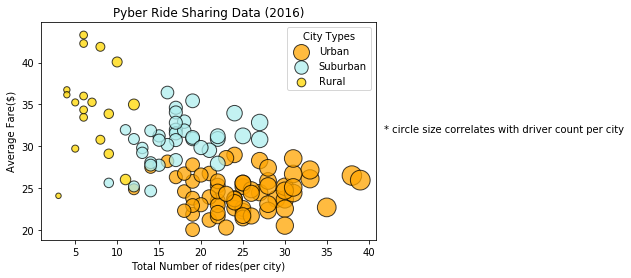

In [104]:
# Obtain the x and y coordinates for each of the three city types
urban_df = single_data.loc[single_data['type'] == 'Urban', :]
urban_driver_count = urban_df.groupby('city').count()['driver_count']
suburban_df = single_data.loc[single_data['type'] == 'Suburban', :]
suburban_driver_count = suburban_df.groupby('city').count()['driver_count']
rural_df = single_data.loc[single_data['type'] == 'Rural', :]
rural_driver_count = rural_df.groupby('city').count()['driver_count']
urban_x = urban_df.groupby(['type','city']).count()['ride_id'] 
urban_y = urban_df.groupby(['type','city']).mean()['fare'].rename('Average Fare')

suburban_x = suburban_df.groupby(['type','city']).count()['ride_id'] 
suburban_y = suburban_df.groupby(['type','city']).mean()['fare'].rename('Average Fare')

rural_x = rural_df.groupby(['type','city']).count()['ride_id'] 
rural_y = rural_df.groupby(['type','city']).mean()['fare'].rename('Average Fare')
# Build the scatter plots for each city types
urban = plt.scatter(urban_x,urban_y,marker='o',s=urban_driver_count*10 ,facecolor='orange',edgecolors='black', label="Urban", alpha=0.75)
suburban = plt.scatter(suburban_x,suburban_y,marker='o',s=suburban_driver_count*10, facecolor='paleturquoise',edgecolors='black', label="Suburban", alpha=0.75)
rural = plt.scatter(rural_x,rural_y,marker='o',s=rural_driver_count*10, facecolor='gold',edgecolors='black', label="Rural", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Total Number of rides(per city)')
plt.ylabel('Average Fare($)')
plt.title("Pyber Ride Sharing Data (2016)")
# Create a legend
plt.legend(title="City Types",handles=[urban,suburban,rural],loc="best")
# Incorporate a text label regarding circle size
pNote ='* circle size correlates with driver count per city'
plt.text(0.92, 0.5, pNote, fontsize=10, transform=plt.gcf().transFigure)
# Save Figure
plt.savefig('ridesharing.png')

In [103]:
# Show plot
plt.show()

## Total Fares by City Type

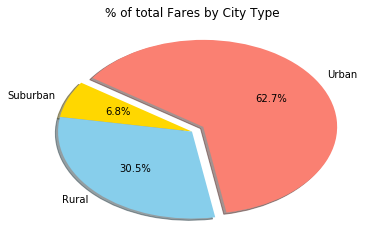

In [105]:
total_fares = single_data['fare'].sum()
# Calculate Type Percents
urban_pct_fares = (urban_df['fare'].sum() / total_fares) * 100
suburban_pct_fares = (suburban_df['fare'].sum()/ total_fares) * 100
rural_pct_fares = (rural_df['fare'].sum()/total_fares)*100
# Build Pie Chart
data = [urban_pct_fares,rural_pct_fares,suburban_pct_fares]
labels = ["Urban","Suburban","Rural"]
colors=["salmon","gold","skyblue"]
explode = (0.1,0,0)
plt.title("% of total Fares by City Type")
plt.pie(data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-80)
# Save Figure
plt.savefig('fares_by_city.png')

In [106]:
# Show Figure
plt.show()

## Total Rides by City Type

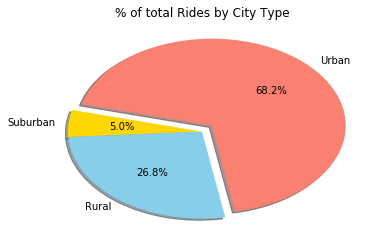

In [108]:
# Calculate Ride Percents
total_rides = single_data['ride_id'].sum()
urban_pct_rides =  (urban_df['ride_id'].sum() / total_rides) * 100
suburban_pct_rides =  (suburban_df['ride_id'].sum() / total_rides) * 100
rural_pct_rides =  (rural_df['ride_id'].sum() / total_rides) * 100
# Build Pie Chart
data = [urban_pct_rides,rural_pct_rides,suburban_pct_rides]
labels = ["Urban","Suburban","Rural"]
colors=["salmon","gold","skyblue"]
explode = (0.1,0,0)
plt.title("% of total Rides by City Type")
plt.pie(data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-80)
# Save Figure
plt.savefig('rides_by_city.png')

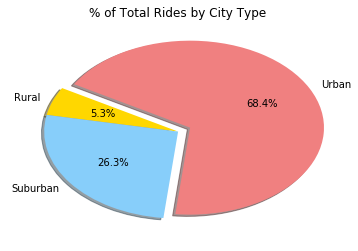

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

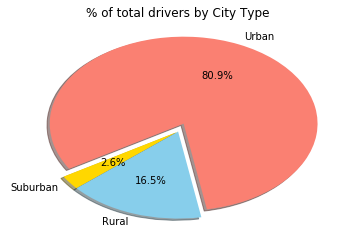

In [109]:
# Calculate Driver Percents
total_drivers = city_data['driver_count'].sum();

drivers = city_data.groupby('type').sum()['driver_count']
drivers_df = pd.DataFrame(drivers).reset_index()


rural_drivers = pd.DataFrame(drivers_df.loc[drivers_df["type"] == "Rural"])
rural_drivers_pct = (rural_drivers['driver_count'] /total_drivers)*100

urban_drivers = drivers_df.loc[drivers_df["type"] == "Urban"]
urban_drivers_pct =(urban_drivers['driver_count'] /total_drivers)*100

suburban_drivers = drivers_df.loc[drivers_df["type"] == "Suburban"]
suburban_drivers_pct = (suburban_drivers['driver_count'] /total_drivers)*100


# Build Pie Charts
data = [urban_drivers_pct.iloc[0],rural_drivers_pct.iloc[0],suburban_drivers_pct.iloc[0]]
labels = ["Urban","Suburban","Rural"]
colors=["salmon","gold","skyblue"]
explode = (0.1,0,0)
plt.title("% of total drivers by City Type")
plt.pie(data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-80)
# Save Figure
plt.savefig('drivers_by_city.png')

In [110]:
# Show Figure
plt.show()